In [45]:
import pandas as pd

df=pd.read_csv("datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
from scipy.spatial import distance
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [49]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [50]:
def knn(x_train,y_train,x,k=5,metric='euclidean'):
    if metric=='euclidean':
        func=distance.euclidean
    elif metric=='manhattan':
        func=distance.cityblock
    distances=[func(X_train,x) for X_train in x_train]
#     get k nearest samples
    k_indices=np.argsort(distances)[:k]
#     most common class
    return Counter(y_train.iloc[k_indices]).most_common(1)[0][0]

def predict(x_train,y_train,xt,k=5,metric='euclidean'):
    return [knn(x_train,y_train,x,k,metric) for x in xt]

In [51]:
from sklearn.metrics import accuracy_score

y_pred_euclidean=predict(x_train,y_train,x_test,k=5,metric='euclidean')
a=accuracy_score(y_test,y_pred_euclidean)
print(a)

y_pred_manhattan=predict(x_train,y_train,x_test,k=5,metric='manhattan')
a=accuracy_score(y_test,y_pred_manhattan)
print(a)

0.6948051948051948
0.6623376623376623


Text(0, 0.5, 'accuracy')

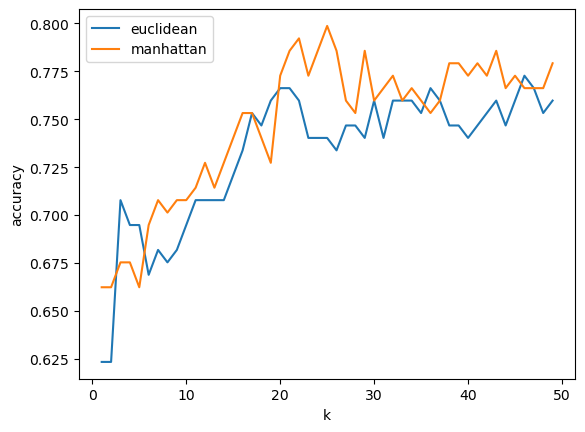

In [54]:
import matplotlib.pyplot as plt
k_values=[i for i in range(1,50)]

e=[accuracy_score(y_test,predict(x_train,y_train,x_test,k,metric='euclidean')) for k in k_values]
m=[accuracy_score(y_test,predict(x_train,y_train,x_test,k,metric='manhattan')) for k in k_values]

plt.plot(k_values,e,label="euclidean")
plt.plot(k_values,m,label="manhattan")

plt.legend()
plt.xlabel("k")
plt.ylabel("accuracy")